In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'\Data\OnlineRetail.csv', encoding = 'latin')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Data Cleaning

**Which attribute determines other attributes?**

In the OnlineRetail dataset, the StockCode attribute determines the following attributes:

- Description
-  UnitPrice
-  Quantity
- Discount


• Check duplicated rows

• Which attribute determines other attributes?

• Visualize the distribution of Quantity attribute using pandas DataFrame’s plot.box

• What anomalies have you observed? 

• Make a hypothesis about these anomalies and check this hypothesis.

• Filter out all cancelled orders

In [5]:
df.duplicated().sum()


5268

<Axes: >

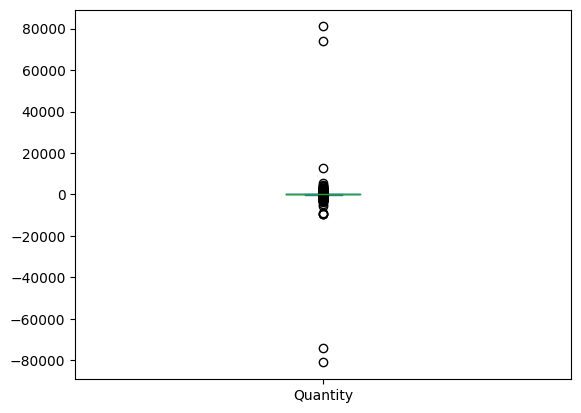

In [6]:
df['Quantity'].plot.box()

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**By observing the boxplot we could see the anomolies in the Quantity and UnitPrice columns. These two columns contains some values that are negative, which is completely strange. For this, we should investigate the reason why these annomiles appeared**

**Hypothesis about the negative value of Quantity** :

 The reasons why there are negative values of Quantity in our dataset might due to the fact that many orders were canceled after a time of purchasing

**Filter out all cancel data**

*Note that: if an InvoiceNo starts with letter 'c', it indicates a canceled order*

In [8]:
df['OrderCancel'] = df['InvoiceNo'].str.startswith('C')
df[df['Quantity'] < 0]['OrderCancel'].value_counts()


True     9288
False    1336
Name: OrderCancel, dtype: int64

# Analyst Time Series Trends

**Calculate the number of orders received by month**
    
    • Create new column named year-month to extract year and month from InvoiceDate
    column using strftime
    • Groupby year-month column and count the number of unique InvoiceNo for each month
    • Visualize monthly time-series data using line charts

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year_month'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df['year_month']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: year_month, Length: 541909, dtype: object

In [10]:
grouped_year_month_orders = df.groupby(['year_month'])['InvoiceNo'].nunique()
grouped_year_month_orders

year_month
2010-12    2025
2011-01    1476
2011-02    1393
2011-03    1983
2011-04    1744
2011-05    2162
2011-06    2012
2011-07    1927
2011-08    1737
2011-09    2327
2011-10    2637
2011-11    3462
2011-12    1015
Name: InvoiceNo, dtype: int64

**Visualize monthly time-serires data**

Text(0, 0.5, 'Number of orders')

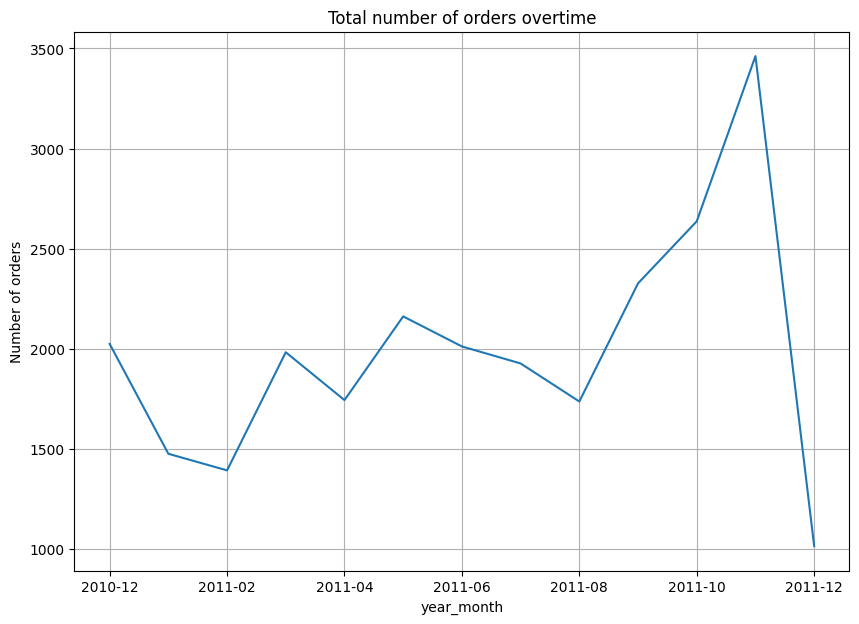

In [11]:
ax = grouped_year_month_orders.plot(figsize = (10,7), grid = True)
ax.set_title('Total number of orders overtime')
ax.set_ylabel('Number of orders')

**Filter out incomplete data for December 2011**

In [12]:
# Filter out incomplete data for December 2011
df_december_filtered = df[(df['InvoiceDate'] >= '2011-12-01') &
                 (df['InvoiceDate'] <= '2011-12-31')]
df_december_filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,year_month
516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,2011-12-01 08:12:00,4.15,13853.0,United Kingdom,True,2011-12
516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,2011-12-01 08:14:00,1.25,15197.0,United Kingdom,True,2011-12
516386,C579890,23374,RED SPOT PAPER GIFT BAG,-1,2011-12-01 08:14:00,0.82,15197.0,United Kingdom,True,2011-12
516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,2011-12-01 08:14:00,0.85,15197.0,United Kingdom,True,2011-12
516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01 08:18:00,25.00,13644.0,United Kingdom,True,2011-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12


In [13]:
# Number of days data collected of each month
grouped = df.groupby('year_month')
grouped['InvoiceDate'].agg(max) - grouped['InvoiceDate'].agg(min)


year_month
2010-12   22 days 09:15:00
2011-01   27 days 06:59:00
2011-02   27 days 08:41:00
2011-03   30 days 11:25:00
2011-04   27 days 11:31:00
2011-05   30 days 05:02:00
2011-06   29 days 12:31:00
2011-07   30 days 07:48:00
2011-08   30 days 09:15:00
2011-09   29 days 08:57:00
2011-10   29 days 06:47:00
2011-11   29 days 09:26:00
2011-12    8 days 04:38:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [14]:
# Drop orders data of December 2011
df = df.drop(index= df_december_filtered.index)

Text(0, 0.5, 'number of orders')

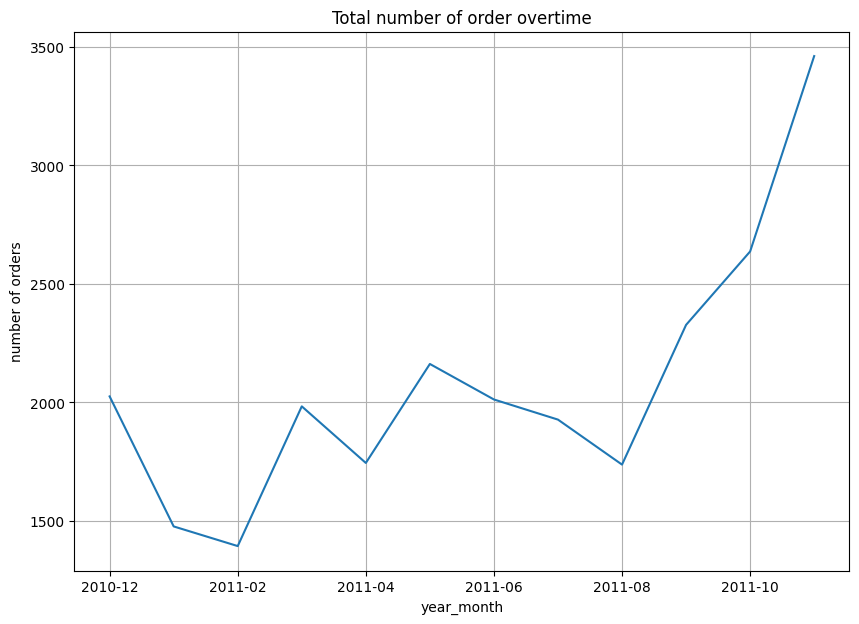

In [15]:
grouped_year_month_orders = df.groupby(['year_month'])['InvoiceNo'].nunique()
ax = grouped_year_month_orders.plot(figsize=(10, 7), grid=True)
ax.set_title('Total number of order overtime')
ax.set_ylabel('number of orders')

**Conclusion**

- The line chart shows that there was a spike in sales during the Christmas holiday season in December 2011. This is likely due to the fact that many people buy gifts for their loved ones during the holiday season.


- It is important to note that this is just one possible explanation for the spike in sales. There could be other factors that contributed to the increase, such as a new marketing campaign or a change in the product line.

**Calculate monthly revenue data**

Text(0, 0.5, 'Sale Revenue')

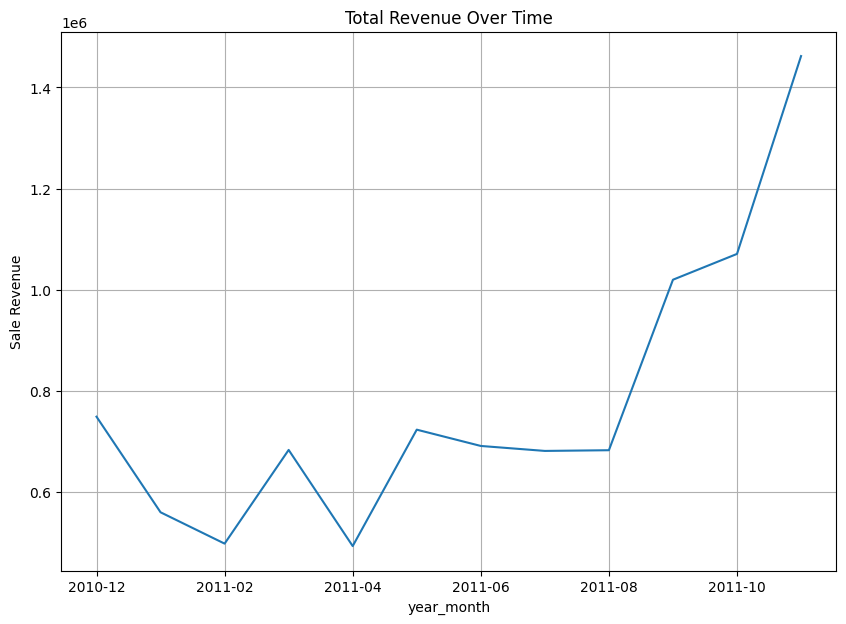

In [16]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
ax = df.groupby(['year_month'])['Revenue'].sum().plot(
    figsize=(10, 7), grid=True)
ax.set_title('Total Revenue Over Time')
ax.set_ylabel('Sale Revenue')


# Repeat Customers

**Calculate the number of repeat customers per month**

In [17]:
grouped_df = df.groupby(['year_month','CustomerID'])['InvoiceNo'].nunique().reset_index()
grouped_df

,year_month,CustomerID,InvoiceNo
0,2010-12,12347.0,1
1,2010-12,12348.0,1
2,2010-12,12370.0,2
3,2010-12,12377.0,1
4,2010-12,12383.0,1
...,...,...,...
12984,2011-11,18263.0,2
12985,2011-11,18270.0,1
12986,2011-11,18274.0,2
12987,2011-11,18276.0,2


In [18]:
# Filter out customer that make ply 1 purchase for a given month
single_order_customer_df = grouped_df[grouped_df['InvoiceNo']==1].copy()
single_order_customer_df

,year_month,CustomerID,InvoiceNo
0,2010-12,12347.0,1
1,2010-12,12348.0,1
3,2010-12,12377.0,1
4,2010-12,12383.0,1
5,2010-12,12386.0,1
...,...,...,...
12980,2011-11,18241.0,1
12981,2011-11,18246.0,1
12982,2011-11,18249.0,1
12983,2011-11,18259.0,1


In [19]:
# Filter out repeat customers : customer that have more than one order in that month
repeat_customer_df = grouped_df[grouped_df['InvoiceNo'] > 1].\
    groupby('year_month')['CustomerID'].count().reset_index()
repeat_customer_df.columns = ['order_date','num_repeat_customers']
repeat_customer_df

,order_date,num_repeat_customers
0,2010-12,357
1,2011-01,253
2,2011-02,243
3,2011-03,321
4,2011-04,269
5,2011-05,396
6,2011-06,332
7,2011-07,327
8,2011-08,298
9,2011-09,400


**Calculate percentage of customer return for each month**

In [20]:
# Calculate total number of customers of each month
full_customer_df = grouped_df.groupby(['year_month'])['CustomerID'].count().reset_index()
full_customer_df.columns = ['order_date','total_customers']
full_customer_df

,order_date,total_customers
0,2010-12,948
1,2011-01,783
2,2011-02,798
3,2011-03,1020
4,2011-04,899
5,2011-05,1079
6,2011-06,1051
7,2011-07,993
8,2011-08,980
9,2011-09,1302


In [21]:
# merge total_customer column
repeat_customer_df = repeat_customer_df.merge(full_customer_df,on = 'order_date' ,how='left')
repeat_customer_df

,order_date,num_repeat_customers,total_customers
0,2010-12,357,948
1,2011-01,253,783
2,2011-02,243,798
3,2011-03,321,1020
4,2011-04,269,899
5,2011-05,396,1079
6,2011-06,332,1051
7,2011-07,327,993
8,2011-08,298,980
9,2011-09,400,1302


In [22]:
repeat_customer_df['percentage_return'] = repeat_customer_df['num_repeat_customers'] / repeat_customer_df['total_customers']
repeat_customer_df

,order_date,num_repeat_customers,total_customers,percentage_return
0,2010-12,357,948,0.376582
1,2011-01,253,783,0.323116
2,2011-02,243,798,0.304511
3,2011-03,321,1020,0.314706
4,2011-04,269,899,0.299221
5,2011-05,396,1079,0.367006
6,2011-06,332,1051,0.315890
7,2011-07,327,993,0.329305
8,2011-08,298,980,0.304082
9,2011-09,400,1302,0.307220


**Visualize all of this data in one chart**

Text(0.5, 1.0, 'Percentage Customer Return Over Time')

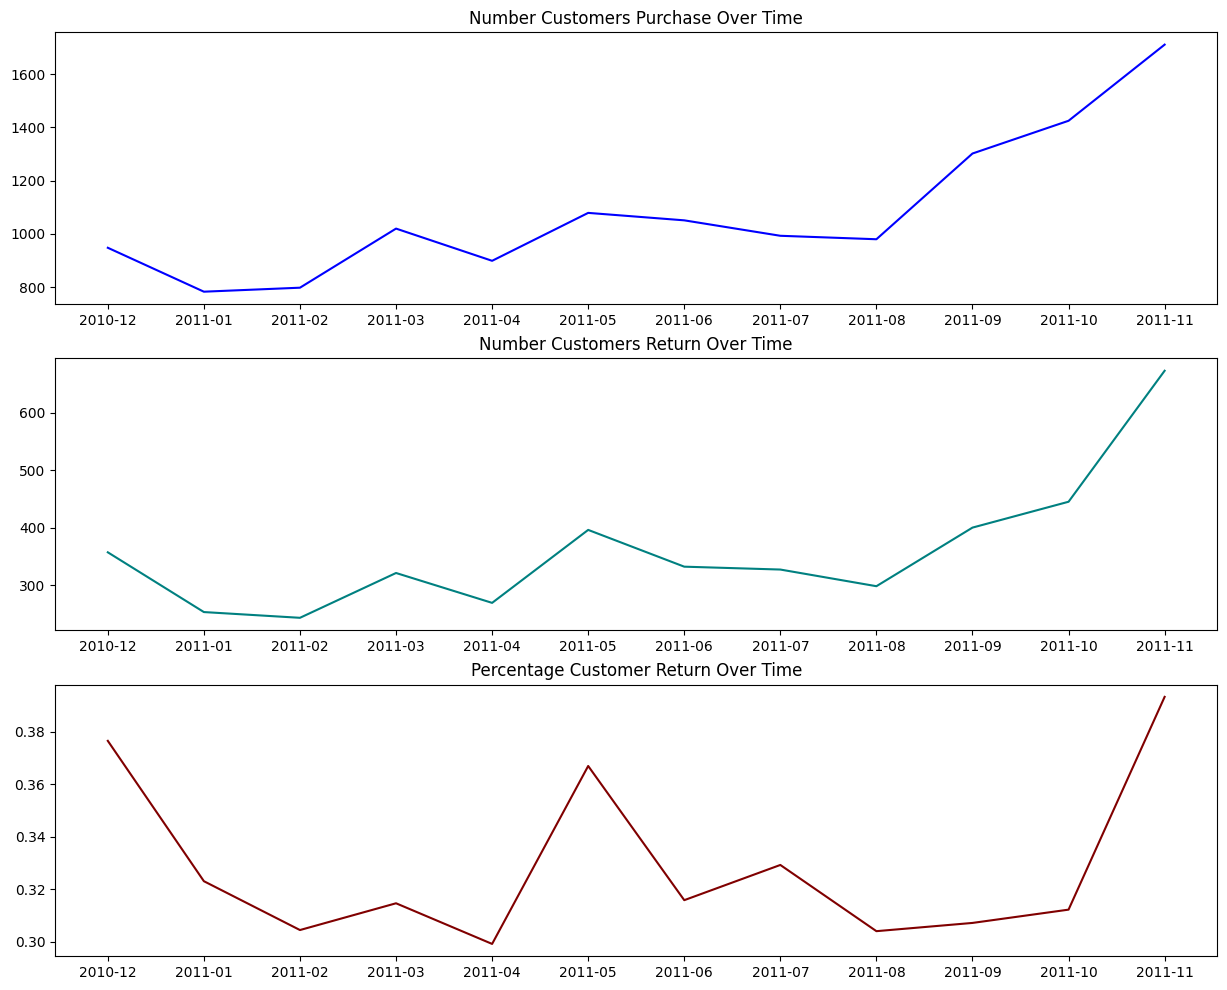

In [70]:
fig, ax = plt.subplots(3,1,figsize = (15,12))
ax[0].plot(repeat_customer_df['order_date'],repeat_customer_df['total_customers'], color = 'blue')
ax[0].set_title('Number Customers Purchase Over Time')

ax[1].plot(repeat_customer_df['order_date'],repeat_customer_df['num_repeat_customers'],color = 'teal')
ax[1].set_title('Number Customers Return Over Time')

ax[2].plot(repeat_customer_df['order_date'],repeat_customer_df['percentage_return'],color = 'maroon')
ax[2].set_title('Percentage Customer Return Over Time')

**Analyze how much of the monthly revenue comes from these Repeat Customers**

In [24]:
agg_func = {'InvoiceNo' : 'nunique',
            'Revenue' : 'sum'}

grouped_df = df.groupby(['year_month','CustomerID']).agg(agg_func).reset_index()
grouped_df.columns = ['year_month','CustomerID','num_invoice','spending_amount']
grouped_df

,year_month,CustomerID,num_invoice,spending_amount
0,2010-12,12347.0,1,7.117900e+02
1,2010-12,12348.0,1,8.928000e+02
2,2010-12,12370.0,2,1.868020e+03
3,2010-12,12377.0,1,1.001520e+03
4,2010-12,12383.0,1,6.007200e+02
...,...,...,...,...
12984,2011-11,18263.0,2,3.996800e+02
12985,2011-11,18270.0,1,1.712000e+02
12986,2011-11,18274.0,2,1.776357e-15
12987,2011-11,18276.0,2,-1.250000e+01


In [25]:
# Filter out customer who make only one purchases
grouped_df[grouped_df['num_invoice'] == 1]

,year_month,CustomerID,num_invoice,spending_amount
0,2010-12,12347.0,1,711.79
1,2010-12,12348.0,1,892.80
3,2010-12,12377.0,1,1001.52
4,2010-12,12383.0,1,600.72
5,2010-12,12386.0,1,258.90
...,...,...,...,...
12980,2011-11,18241.0,1,117.54
12981,2011-11,18246.0,1,363.20
12982,2011-11,18249.0,1,95.34
12983,2011-11,18259.0,1,1070.40


In [26]:
#  Groupby year_month , using aggregation function sum for Revenue column
#  Calculate total revenue each month
revenue_customer_df = df.groupby('year_month')['Revenue'].agg('sum').reset_index()
revenue_customer_df.columns = ['year_month','total_revenue']
revenue_customer_df

,year_month,total_revenue
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


In [27]:
revenue_repeat_df = grouped_df[grouped_df['num_invoice'] > 1].groupby('year_month')['spending_amount'].agg('sum').reset_index()
revenue_repeat_df.columns = ['year_month','repeat_customer_revenue']
revenue_repeat_df

,year_month,repeat_customer_revenue
0,2010-12,382021.39
1,2011-01,262611.09
2,2011-02,221947.16
3,2011-03,325890.85
4,2011-04,217977.96
5,2011-05,404448.72
6,2011-06,374174.13
7,2011-07,346158.02
8,2011-08,346870.93
9,2011-09,554521.59


In [28]:
revenue_customer_df = revenue_customer_df.merge(revenue_repeat_df, on = 'year_month', how='left')
revenue_customer_df

,year_month,total_revenue,repeat_customer_revenue
0,2010-12,748957.020,382021.39
1,2011-01,560000.260,262611.09
2,2011-02,498062.650,221947.16
3,2011-03,683267.080,325890.85
4,2011-04,493207.121,217977.96
5,2011-05,723333.510,404448.72
6,2011-06,691123.120,374174.13
7,2011-07,681300.111,346158.02
8,2011-08,682680.510,346870.93
9,2011-09,1019687.622,554521.59


In [29]:
revenue_customer_df['percentage_revenue_repeat_customer'] = revenue_customer_df['repeat_customer_revenue'] / revenue_customer_df['total_revenue']
revenue_customer_df

,year_month,total_revenue,repeat_customer_revenue,percentage_revenue_repeat_customer
0,2010-12,748957.020,382021.39,0.510071
1,2011-01,560000.260,262611.09,0.468948
2,2011-02,498062.650,221947.16,0.445621
3,2011-03,683267.080,325890.85,0.476960
4,2011-04,493207.121,217977.96,0.441960
5,2011-05,723333.510,404448.72,0.559146
6,2011-06,691123.120,374174.13,0.541400
7,2011-07,681300.111,346158.02,0.508084
8,2011-08,682680.510,346870.93,0.508101
9,2011-09,1019687.622,554521.59,0.543815


# Trending Items Over Time

In [30]:
grouped_items_df = df.groupby(['year_month','StockCode'])['Quantity'].sum().reset_index()
grouped_items_df

,year_month,StockCode,Quantity
0,2010-12,10002,251
1,2010-12,10120,16
2,2010-12,10123C,1
3,2010-12,10124A,4
4,2010-12,10124G,5
...,...,...,...
32192,2011-11,DCGSSGIRL,1
32193,2011-11,DOT,47
32194,2011-11,M,3659
32195,2011-11,POST,1231


**• What items were sold the most on November 30, 2011 ?**

In [31]:
df['year_month_day'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
group = df.groupby(['year_month_day','StockCode'])['Quantity'].sum().reset_index()
group[group['year_month_day']=='2011-11-30'].sort_values(by='Quantity',ascending=False)

,year_month_day,StockCode,Quantity
268318,2011-11-30,20668,942
269532,2011-11-30,84212,480
268684,2011-11-30,22197,469
269109,2011-11-30,23084,407
269051,2011-11-30,22952,394
...,...,...,...
269549,2011-11-30,84581,-41
269448,2011-11-30,35648,-52
269647,2011-11-30,85172,-145
269565,2011-11-30,84859C,-153


**Top 5 best seller items of November 2011**

In [32]:
grouped_items_df[grouped_items_df['year_month'] == '2011-11'].sort_values(by='Quantity',ascending=False)[:5]

,year_month,StockCode,Quantity
30855,2011-11,23084,14883
31736,2011-11,84826,12551
30092,2011-11,22197,12159
30000,2011-11,22086,7868
31877,2011-11,85099B,5807


As you can see from this result, the products with the codes 23084, 84826,22197, 22086, and 85099B were the top five best-sellers in the month of November 2011.

**Calculate the monthly sales data for these five products again**

• Keep records with the StockCode that matches with the top five bestsellers’ item codes from the transaction dataset

• Groupby year_month and StockCode, sum by Quantity

• Visualize the trends of each item over time 

In [33]:
best_seller_items = ['23084', '84826','22197', '22086','85099B']
trending_items_df = df[df['StockCode'].isin(best_seller_items)]\
.groupby(['year_month','StockCode'])['Quantity'].sum()

trending_items_df

year_month  StockCode
2010-12     22086         2453
            22197         2731
            84826          306
            85099B        2126
2011-01     22086           24
            22197         1809
            84826          480
            85099B        2639
2011-02     22086            5
            22197         2663
            84826           66
            85099B        3078
2011-03     22086           87
            22197         2798
            84826           60
            85099B        5281
2011-04     22086          -27
            22197         1856
            84826            1
            85099B        2452
2011-05     22086           17
            22197         6848
            23084         1131
            85099B        3617
2011-06     22086          344
            22197         2092
            23084         1693
            84826            4
            85099B        3676
2011-07     22086          377
            22197         1862
            23084

Text(0.5, 1.0, 'Item Trends Over Time')

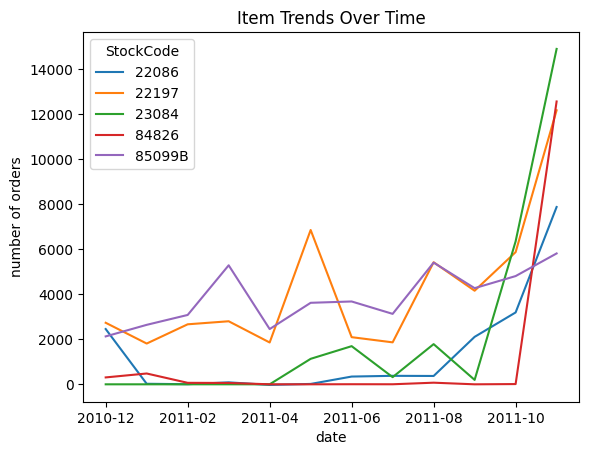

In [71]:
ax = trending_items_df.unstack().fillna(0).plot()
ax.set_ylabel('number of orders')
ax.set_xlabel('date')
ax.set_title('Item Trends Over Time')

In [35]:
df[((df['StockCode']=='84826') & (df['year_month']=='2011-11'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,year_month,Revenue,year_month_day
452377,575336,84826,ASSTD DESIGN 3D PAPER STICKERS,4,2011-11-09 13:58:00,0.85,14968.0,United Kingdom,False,2011-11,3.40,2011-11-09
452421,575337,84826,ASSTD DESIGN 3D PAPER STICKERS,5,2011-11-09 14:11:00,0.85,17867.0,United Kingdom,False,2011-11,4.25,2011-11-09
452454,575337,84826,ASSTD DESIGN 3D PAPER STICKERS,1,2011-11-09 14:11:00,0.85,17867.0,United Kingdom,False,2011-11,0.85,2011-11-09
458281,575767,84826,ASSTD DESIGN 3D PAPER STICKERS,1,2011-11-11 11:11:00,0.85,17348.0,United Kingdom,False,2011-11,0.85,2011-11-11
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,False,2011-11,0.00,2011-11-25


Text(0.5, 1.0, 'Item Trends Over Time')

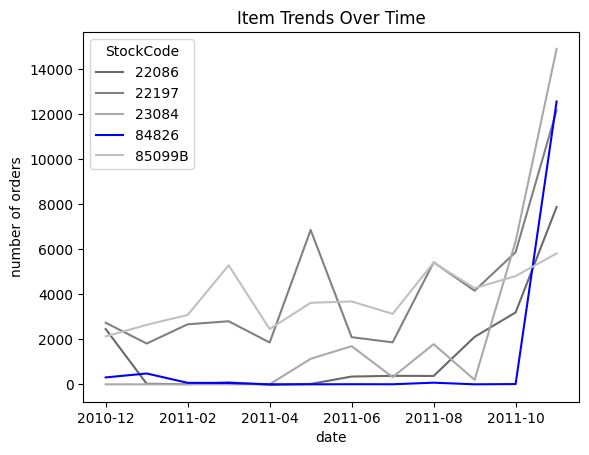

In [78]:
ax = trending_items_df.unstack().fillna(0).plot(color=['#696969','#808080','#A9A9A9','blue','#C0C0C0'])
ax.set_ylabel('number of orders')
ax.set_xlabel('date')
ax.set_title('Item Trends Over Time')

**Item Revenue by Time**

Text(0.5, 1.0, 'Item Revenue Over Time')

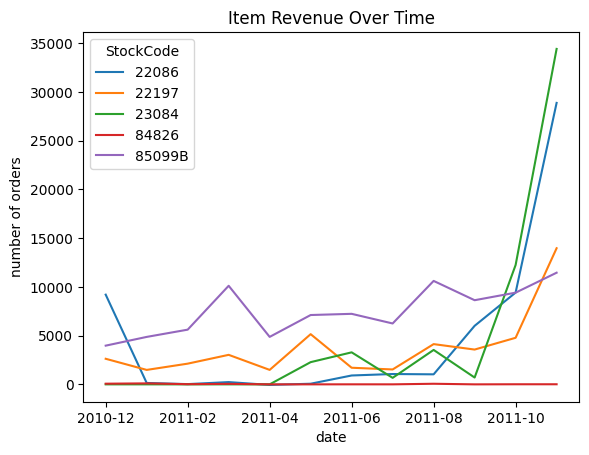

In [81]:
revenue_trending_items_df = df[df['StockCode'].isin(best_seller_items)]\
.groupby(['year_month','StockCode'])['Revenue'].sum()

ax = revenue_trending_items_df.unstack().fillna(0).plot()
ax.set_ylabel('number of orders')
ax.set_xlabel('date')
ax.set_title('Item Revenue Over Time')

Text(0.5, 1.0, 'Item Trends Over Time')

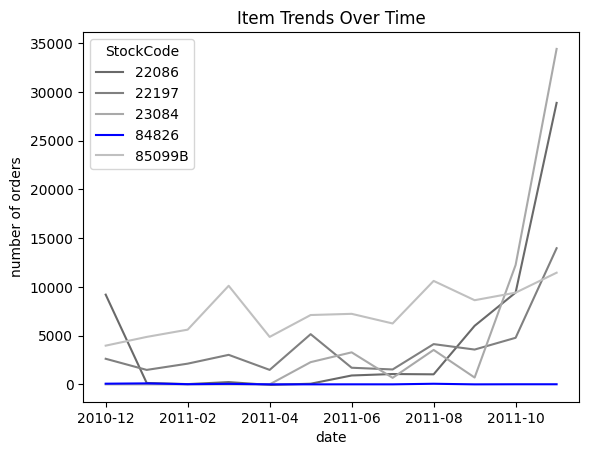

In [82]:
ax = revenue_trending_items_df.unstack().fillna(0).plot(color=['#696969','#808080','#A9A9A9','blue','#C0C0C0'])
ax.set_ylabel('number of orders')
ax.set_xlabel('date')
ax.set_title('Item Trends Over Time')

In [79]:
df[((df['StockCode']=='84826') & (df['year_month'] == '2011-11'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,year_month,Revenue,year_month_day,day_of_week,day_of_month
452377,575336,84826,ASSTD DESIGN 3D PAPER STICKERS,4,2011-11-09 13:58:00,0.85,14968.0,United Kingdom,False,2011-11,3.40,2011-11-09,2,9
452421,575337,84826,ASSTD DESIGN 3D PAPER STICKERS,5,2011-11-09 14:11:00,0.85,17867.0,United Kingdom,False,2011-11,4.25,2011-11-09,2,9
452454,575337,84826,ASSTD DESIGN 3D PAPER STICKERS,1,2011-11-09 14:11:00,0.85,17867.0,United Kingdom,False,2011-11,0.85,2011-11-09,2,9
458281,575767,84826,ASSTD DESIGN 3D PAPER STICKERS,1,2011-11-11 11:11:00,0.85,17348.0,United Kingdom,False,2011-11,0.85,2011-11-11,4,11
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,False,2011-11,0.00,2011-11-25,4,25


**Revenue of each stock codes by day of week**

In [43]:
# findout the days of week that customer orders in a scpecific month
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek
df['day_of_week'].unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

([<matplotlib.axis.XTick at 0x211d2b6b5b0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

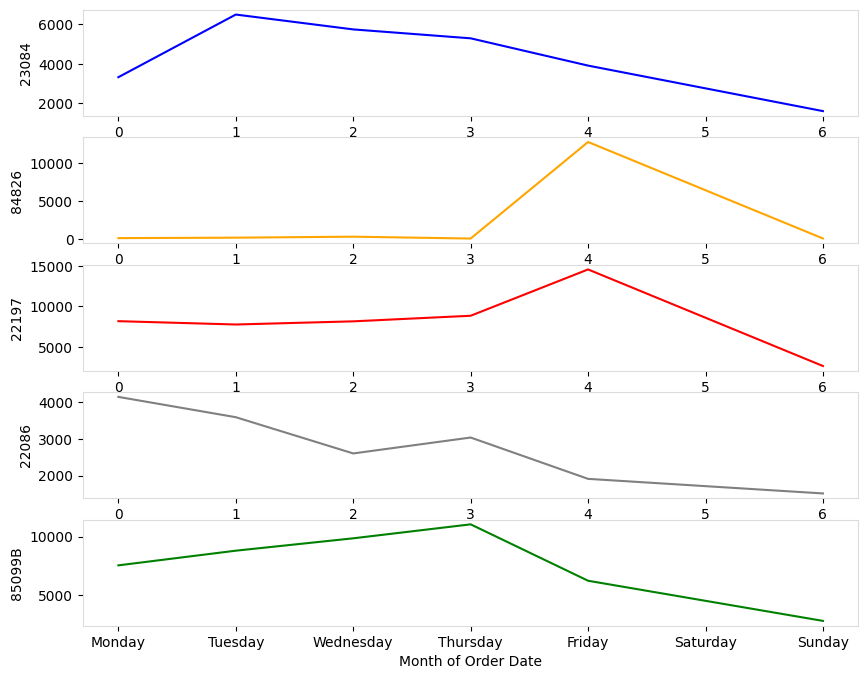

In [44]:
# Revenue of each stock code by day of week
fig, ax = plt.subplots(5,1, figsize = (10,8))
i = 0
colors = ['blue','orange','red','grey','green']

for ax1 in ax:
    df[df['StockCode'] == best_seller_items[i]].groupby('day_of_week')['Quantity'].sum()\
                                                .plot(kind='line', ax=ax1,color = colors[i])
    ax1.spines[['bottom','top','left','right']].set_color('#DCDCDC')
    ticks = ax1.get_xticks()
    ax1.set_xlabel('')
    ax1.set_ylabel(best_seller_items[i])
    i+=1

ax1.set_xlabel('Month of Order Date')
plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

**Revenue of stock codes by day of month**


In [47]:
# findout the days of week that customer orders in a scpecific month
df['day_of_month'] = df['InvoiceDate'].dt.day
df['day_of_month'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 19, 20,
       21, 22, 23,  4, 11, 18, 24, 25, 26, 27, 28, 30, 31, 29],
      dtype=int64)

([], [])

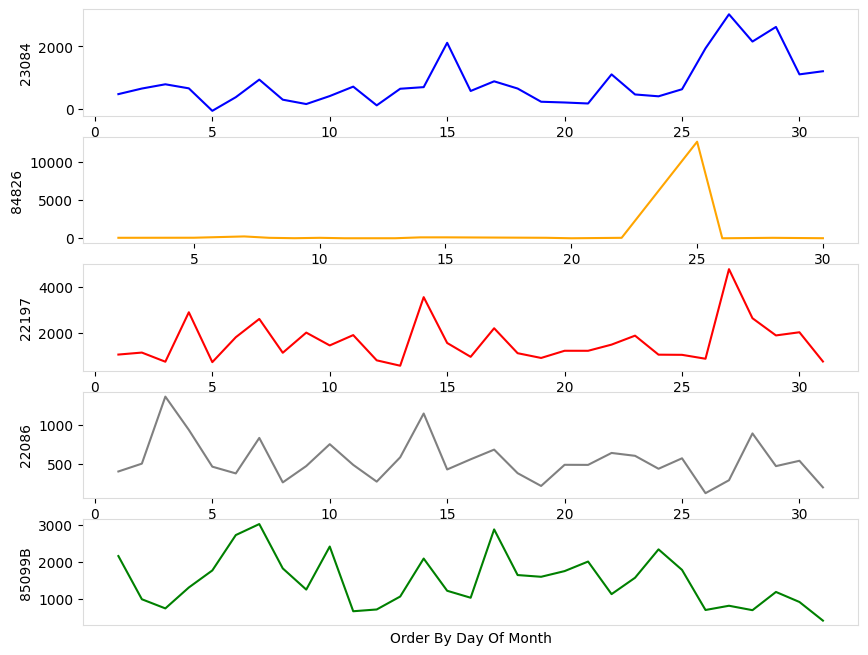

In [83]:
# Revenue of each stock code by day of week
fig, ax = plt.subplots(5,1, figsize = (10,8))
i = 0
colors = ['blue','orange','red','grey','green']

for ax1 in ax:
    df[df['StockCode'] == best_seller_items[i]].groupby('day_of_month')['Quantity'].sum()\
                                                .plot(kind='line', ax=ax1,color = colors[i])
    ax1.spines[['bottom','top','left','right']].set_color('#DCDCDC')
    ticks = ax1.get_xticks()
    ax1.set_xlabel('')
    ax1.set_ylabel(best_seller_items[i])
    i+=1

ax1.set_xlabel('Order By Day Of Month')
plt.xticks(range(31,5))

*****

#  More Discussion



• Is UnitPrice changing over time?

• Does this change affect Sales and Revenues?

• Do the bestsellers change per country?

• Do the sales increase on weekends and end of each month?